In [1]:
import numpy as np

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')[16]
y_test = np.load('y_test.npy')[16]

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='b')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='r')
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c='y')
plt.scatter(X_test[0], X_test[1], c='g')
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

## 2. Find distance between train data and test data

#### (method 1) find distance using list

###### append in list

In [3]:
a = [1,2]
print(a)

a.append(3)
print(a)

[1, 2]
[1, 2, 3]


###### Compute distance using 'append'

In [4]:
dist = []
for i in range(len(X_train)):
    dist.append(np.sqrt(np.sum((X_train[i] - X_test)**2)))
    #dist.append(np.linalg.norm(X_train[i] - X_test))

![image](./image/image4.png)

#### (method 2) find distance using broadcasting in numpy

![image](./image/image5.png)

In [5]:
#broadcasting in numpy
dist = np.sqrt(np.sum((X_train - X_test)**2, axis=1)) 

In [6]:
print(len(dist), max(dist), min(dist))

130 2.33238075793812 0.22360679774997896


## 3-1. Find its closest data (k=1)

#### argmin in numpy

In [7]:
a = np.array([10,2,3])

In [8]:
print(np.min(a), np.argmin(a))

2 1


#### find the closest data

In [9]:
print(np.argmin(dist))

86


In [10]:
X_train[86]

array([5.8, 4. ])

#### plot in 2 dimensional Euclidean space

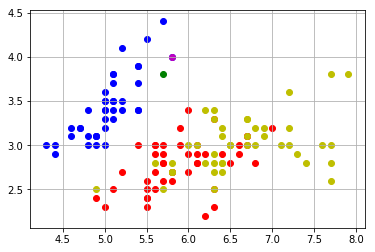

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='b')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='r')
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c='y')
plt.scatter(X_test[0], X_test[1], c='g')
plt.scatter(X_train[86][0], X_train[86][1], c='m')
plt.grid()
plt.show()

## 4-1. Classify label of test data

In [12]:
y_train[86]

0.0

In [13]:
y_hat = y_train[86]
print(y_hat)

0.0


#### Check the answer

In [14]:
y_hat == y_test

True

In [15]:
y_test

0.0

## 3-2. Find its 3-nearest data (k=3)

#### argsort in numpy

In [16]:
a = np.array([20,30,10])

print(np.sort(a), np.argsort(a))

[10 20 30] [2 0 1]


In [17]:
np.argsort(a)

array([2, 0, 1], dtype=int64)

#### Find 3-nearest data

In [18]:
np.argsort(dist)[:3]

array([86, 98, 40], dtype=int64)

In [19]:
print(y_train[86], y_train[98], y_train[40])

0.0 0.0 0.0


In [20]:
indices = np.argsort(dist)[:3]

y_near = y_train[indices]
print(y_near, type(y_near))

[0. 0. 0.] <class 'numpy.ndarray'>


#### Plot in 2 dimensional Euclidean space

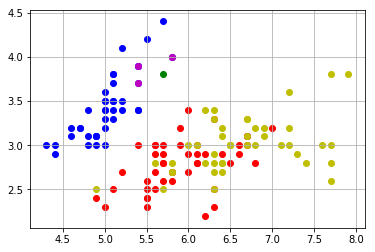

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='b')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='r')
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c='y')
plt.scatter(X_test[0], X_test[1], c='g')
plt.scatter(X_train[86][0], X_train[86][1], c='m')
plt.scatter(X_train[98][0], X_train[98][1], c='m')
plt.scatter(X_train[40][0], X_train[40][1], c='m')
plt.grid()
plt.show()

## 4-2. Classify label of test data

#### count in list

In [22]:
a = [1,1,1,2,3]
a.count(3)

1

#### the number of labels of 3-nearest data

In [23]:
y_near = list(y_near)
y_near.count(0), y_near.count(1), y_near.count(2)

(3, 0, 0)

#### expecting label of test data

In [24]:
np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)])

0

In [25]:
y_hat = np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)])
print(y_hat)

0


#### Check the answer

In [26]:
y_hat == y_test

True

## Exercise

#### find accuracy with 20 test data (k=3)

In [27]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

##### (1) find all of classes of 20 test data

In [28]:
y_hat=[]
for i in range(len(X_test)):
    dist = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
    indices = np.argsort(dist)[:3]
    y_near = list(y_train[indices])
    y_hat.append(np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)]))
y_hat

[1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0]

##### (2) find accuracy

In [24]:
accuracy = np.mean(y_hat == y_test)

print("accuracy of k =",3, ":", accuracy)

accuracy of k = 3 : 0.65
